In [ ]:
# Trabajando con Datafram de Steam
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'

Mounted at /content/gdrive
/content/gdrive/MyDrive


#Dataset con la información de las ventas de Steam

Link enlace del Dataframe:

https://www.kaggle.com/datasets/nikdavis/steam-store-games/data

In [ ]:
df_steam = pd.read_csv('/content/gdrive/MyDrive/Data_Sets_Coderhouse/Steam/steam.csv')
df_steam.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [ ]:
df_steam.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

In [ ]:
# Chequeo si todos los juegos dentro del dataframe están diposnibles para las mismas plataformas
if df_steam['platforms'].nunique() == 1:
  print('All the values in column "Platform" are the same.')
else:
  print('Values in column "Platform" are not the same')

Values in column "Platform" are not the same


In [ ]:
# Ahora quiero imprimir los valores unicos dentro de 'Platforms'

unique_values = df_steam['platforms'].unique() # asignando variable

# Imprimiendo unique_values
print('Los valores unicos dentro de platforms son: ', unique_values)

Los valores unicos dentro de platforms son:  ['windows;mac;linux' 'windows;mac' 'windows' 'windows;linux' 'mac'
 'mac;linux' 'linux']


In [ ]:
# En teoría el dataframe viene limpio pero voy a chequear si hay datos nulos

# Check for NaN Values
nun_values = df_steam.isna()

# Print the DataFrame with True/False indicating NaN values

print("NaN values in the DataFrame: ")
nun_values

NaN values in the DataFrame: 


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27071,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27072,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27073,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
## Check if there are any NaN values in the entire DataFrame
any_nan_in_dataframe = df_steam.isna().any().any()

# # Check if there are any NaN values in a specific column (e.g., 'Column1')
any_nan_in_column = df_steam['price']

print("Any NaN value in the DataFrame: ", any_nan_in_dataframe)
print("Any NaN value in column 'Price': ", any_nan_in_column)

# No hay datos faltantes numericos en el Dataframe

Any NaN value in the DataFrame:  False
Any NaN value in column 'Price':  0        7.19
1        3.99
2        3.99
3        3.99
4        3.99
         ... 
27070    2.09
27071    1.69
27072    3.99
27073    5.19
27074    5.19
Name: price, Length: 27075, dtype: float64


In [ ]:
df_steam.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [ ]:
df_steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [ ]:
# Contando el numero de filas en el data frame utilizando la función shape.
num_rows = df_steam.shape[0]
print("El numero de filas en el Dataframe es de: ", num_rows)

# Contando el numero de filas usando la función len().
num_rows2 = len(df_steam)
print(f'El numero de filas es de : {num_rows2} ')

El numero de filas en el Dataframe es de:  27075
El numero de filas es de : 27075 


In [ ]:
# Filtrando por item especifico
df_steam[df_steam['name'] == 'Team Fortress 2']

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
19,440,Team Fortress 2,2007-10-10,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,Free to Play;Multiplayer;FPS,520,515879,34036,8495,623,20000000-50000000,0.0


Elimino las colpuas appid y steamspy_tags. El primero no es relevante, solamente un identificador. 'steamspy_tags' es columna con generos, pero ya existe la columna 'genres'

In [ ]:
df_steam = df_steam.drop(['appid', 'steamspy_tags'], axis = 1)
df_steam.head()

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,124534,3339,17612,317,10000000-20000000,7.19
1,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,3318,633,277,62,5000000-10000000,3.99
2,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,0,3416,398,187,34,5000000-10000000,3.99
3,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,1273,267,258,184,5000000-10000000,3.99
4,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,5250,288,624,415,5000000-10000000,3.99


Voy a modificar la columna de 'genres' para que solamente aparezca el primer genero, ya que al estar separado por puntos y comas (;)  un titulo acumula muchos generos. El primer genero sería el de mayor importancia

In [ ]:
split_genres = df_steam["genres"].str.split(";", n=1, expand=True)
df_steam["genres"] = split_genres[0]
df_steam.head()

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,124534,3339,17612,317,10000000-20000000,7.19
1,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,3318,633,277,62,5000000-10000000,3.99
2,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,0,3416,398,187,34,5000000-10000000,3.99
3,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,1273,267,258,184,5000000-10000000,3.99
4,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,5250,288,624,415,5000000-10000000,3.99


In [ ]:
 # Primero ordeno en función para ordenar en función de las reviews positivas y negativas.
ordered_by_positive_ratings = df_steam.sort_values(by='positive_ratings', ascending = False)
ordered_by_negative_ratings = df_steam.sort_values(by="negative_ratings", ascending = False)

Text(0, 0.5, 'Positive Ratings')

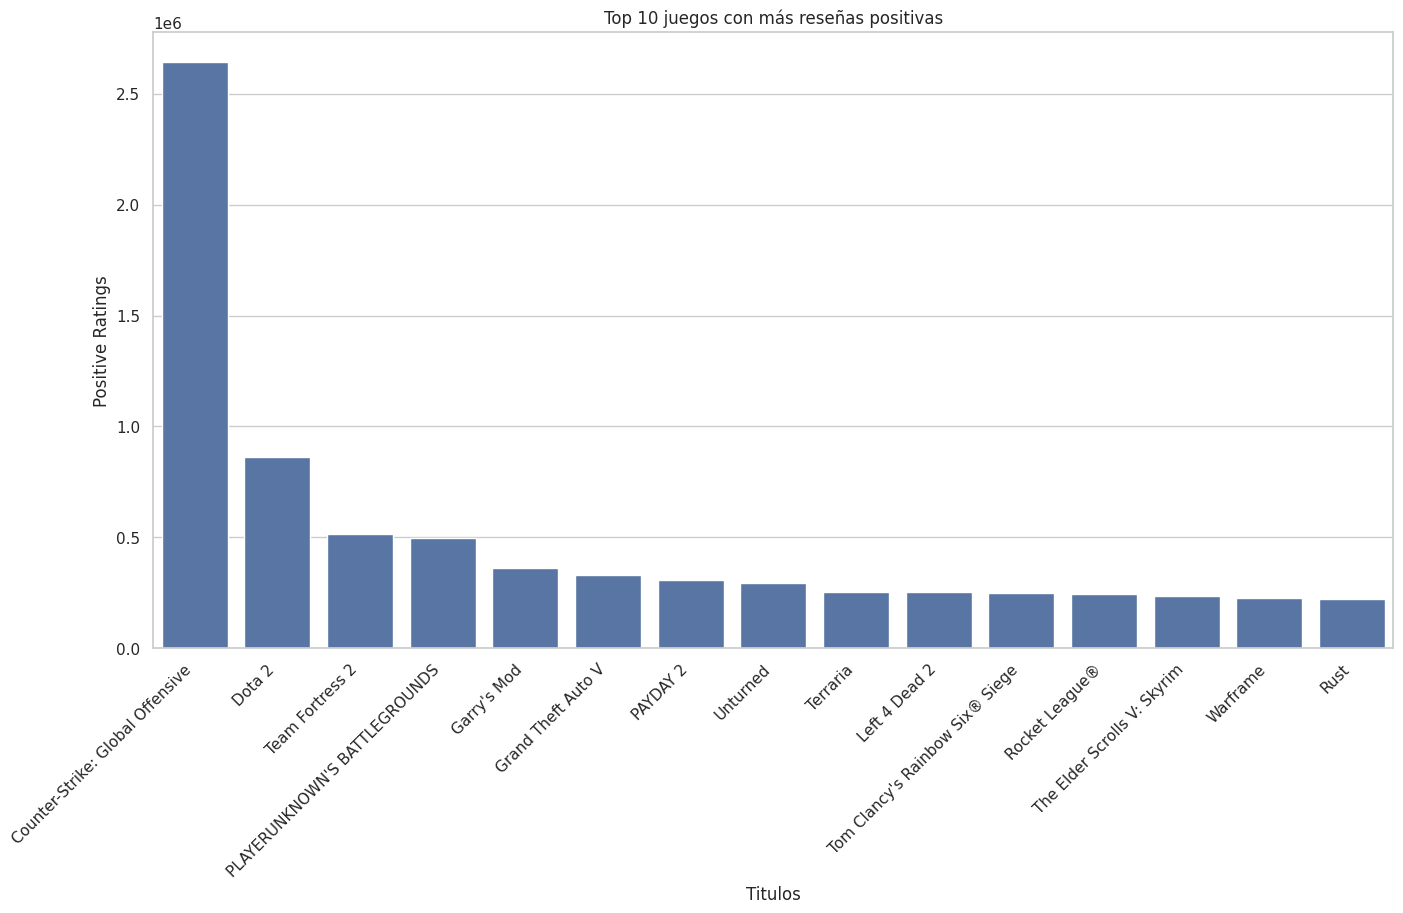

In [ ]:
# Grafico Seaborn para los juegos con mejores "Positives_Ratings"

# Barplot
sns.set_theme(style="whitegrid")
#sns.load_dataset(df_anime)
fig,ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(x="name", y="positive_ratings", data = ordered_by_positive_ratings.head(15)) # hue="developer"
plt.xticks(rotation=45, ha='right')
ax.set_title('Top 10 juegos con más reseñas positivas')
ax.set_xlabel('Titulos')
ax.set_ylabel('Positive Ratings')

Now I filter check for the top 20 with the most positive ratings.

<ipython-input-18-e9924042a52c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='developer', y='positive_ratings', data=dummy_steam.head(20), palette='Set3')


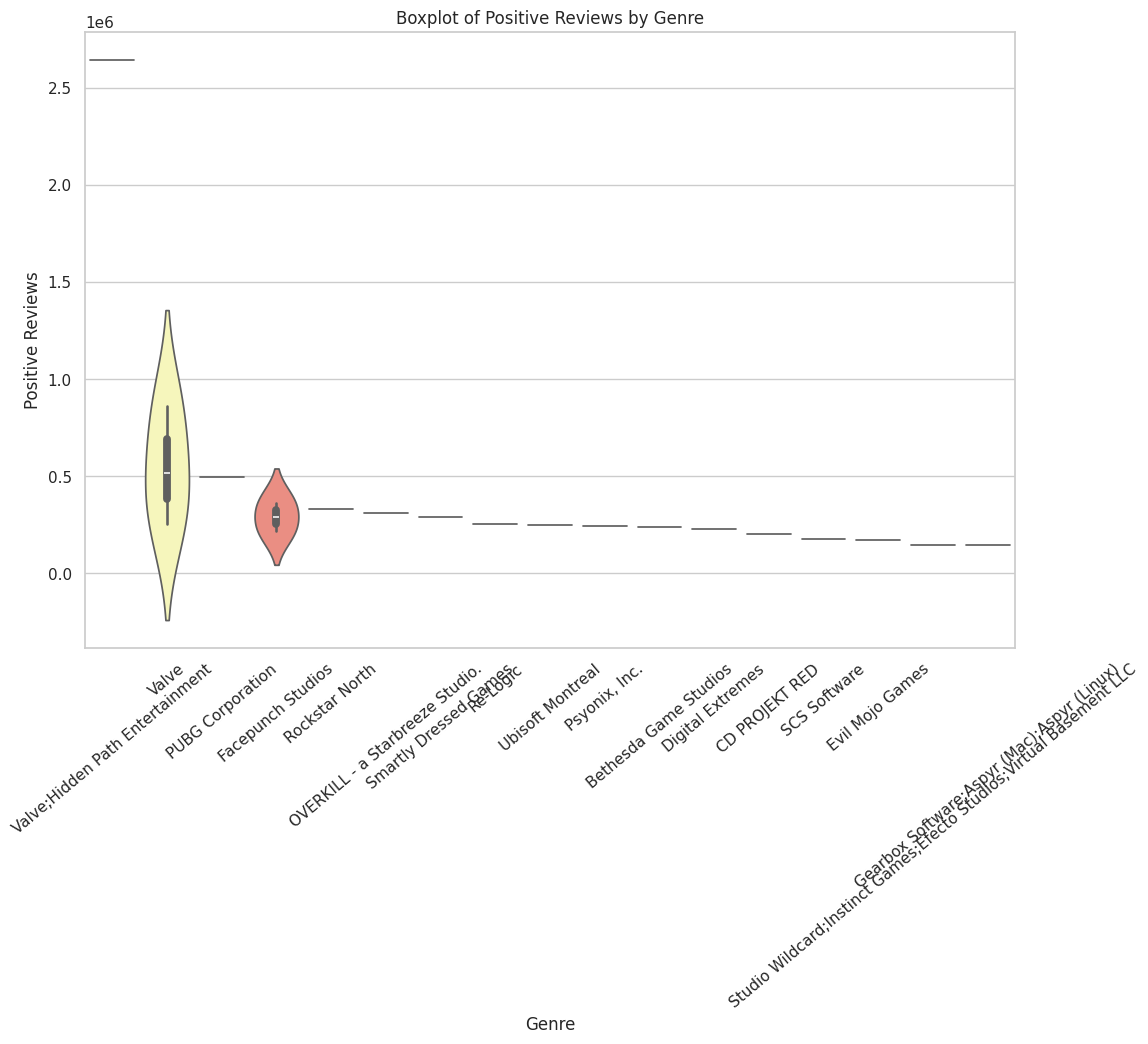

In [ ]:
dummy_steam  = df_steam.sort_values(by='positive_ratings', ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

sns.violinplot(x='developer', y='positive_ratings', data=dummy_steam.head(20), palette='Set3')

# Rotate x-axis labels for better readability
plt.xticks(rotation=40)
plt.xlabel('Genre')
plt.ylabel('Positive Reviews')
plt.title('Boxplot of Positive Reviews by Genre')
plt.show()

In [ ]:
df_steam['positive_ratings'].nlargest(n=20)

25       2644404
22        863507
19        515879
12836     496184
121       363721
2478      329061
1467      308657
3362      292574
1120      255600
21        251789
5235      251178
2031      242561
1025      237303
1634      226541
2016      220370
2964      202930
1596      176769
8129      169580
4712      145035
903       144595
Name: positive_ratings, dtype: int64

Now I will query the top 20 games with the most positive reviews.

In [ ]:
df_steam.query("positive_ratings >= 144595").sort_values(by="positive_ratings", ascending= False, )[['name', 'developer', 'publisher', 'genres', 'price','positive_ratings']]

,name,developer,publisher,genres,price,positive_ratings
25,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,Valve,Action,0.00,2644404
22,Dota 2,Valve,Valve,Action,0.00,863507
19,Team Fortress 2,Valve,Valve,Action,0.00,515879
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,PUBG Corporation,PUBG Corporation,Action,26.99,496184
121,Garry's Mod,Facepunch Studios,Valve,Indie,6.99,363721
2478,Grand Theft Auto V,Rockstar North,Rockstar Games,Action,24.99,329061
1467,PAYDAY 2,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,Action,7.49,308657
3362,Unturned,Smartly Dressed Games,Smartly Dressed Games,Action,0.00,292574
1120,Terraria,Re-Logic,Re-Logic,Action,6.99,255600
21,Left 4 Dead 2,Valve,Valve,Action,7.19,251789


# Gráfico de barras de los juegos con más reviews negativas

Text(0, 0.5, 'negative_ratings ')

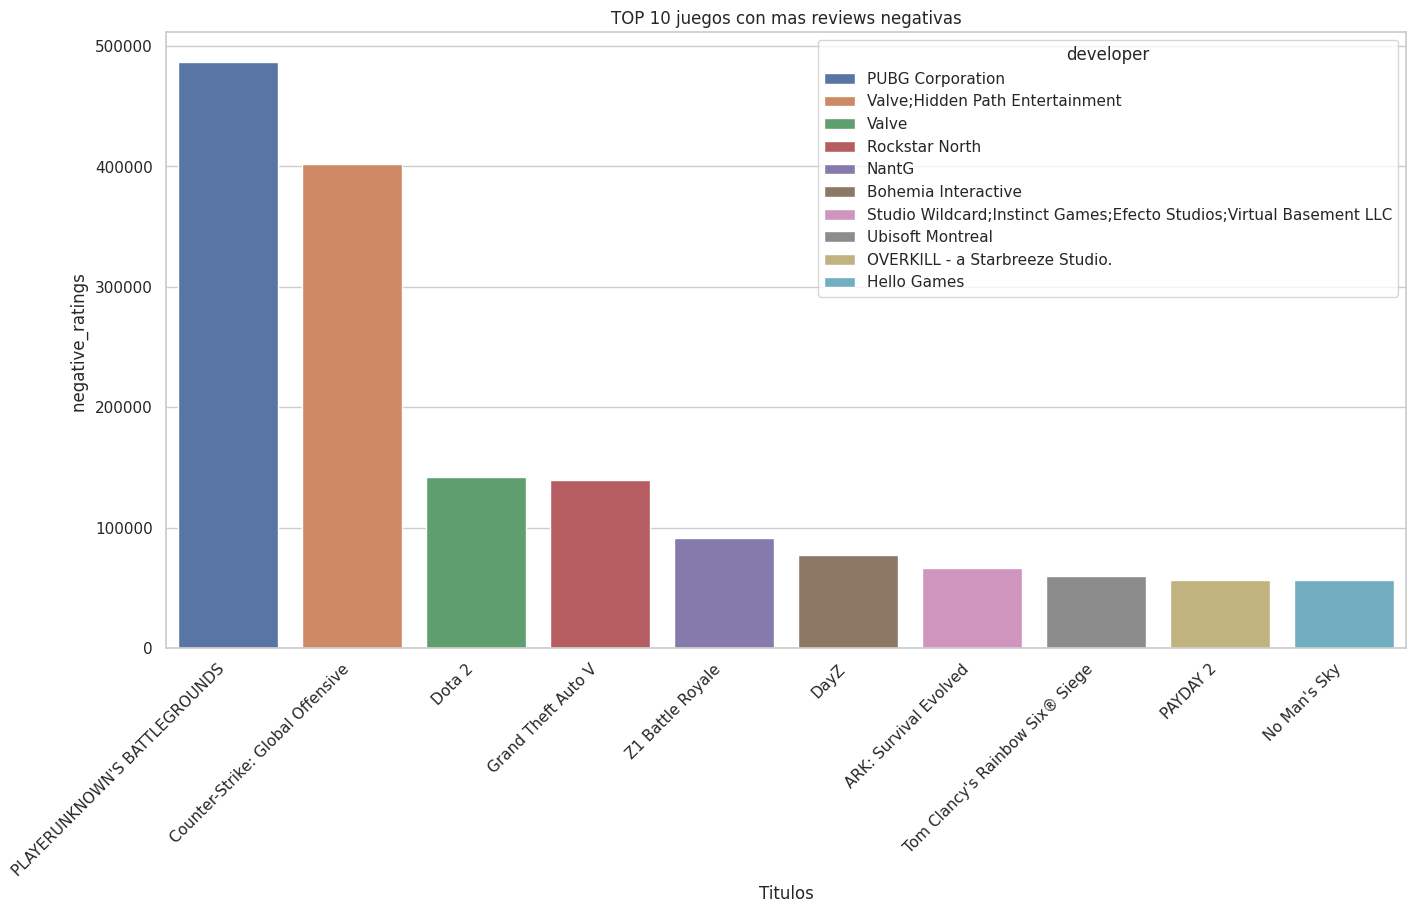

In [ ]:
# Barplot
sns.set_theme(style="whitegrid")
#sns.load_dataset(df_anime)
fig,ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(x="name", y="negative_ratings", hue="developer", data = ordered_by_negative_ratings.head(10))
plt.xticks(rotation=45, ha='right')
ax.set_title('TOP 10 juegos con mas reviews negativas')
ax.set_xlabel('Titulos')
ax.set_ylabel('negative_ratings ')

In [ ]:
df_steam['negative_ratings'].nlargest(n=20)

12836    487076
25       402313
22       142079
2478     139308
7809      91664
1506      77169
4712      66603
5235      59620
1467      56523
2563      56488
2016      53709
5916      45377
6046      44985
12965     35294
1607      34416
19        34036
8129      32407
3362      31482
3251      30987
3347      25920
Name: negative_ratings, dtype: int64

In [ ]:
df_steam.query('negative_ratings >= 25920').sort_values(by='negative_ratings', ascending= False, )[['name', 'developer', 'publisher', 'genres','price','negative_ratings']]

,name,developer,publisher,genres,price,negative_ratings
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,PUBG Corporation,PUBG Corporation,Action,26.99,487076
25,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,Valve,Action,0.00,402313
22,Dota 2,Valve,Valve,Action,0.00,142079
2478,Grand Theft Auto V,Rockstar North,Rockstar Games,Action,24.99,139308
7809,Z1 Battle Royale,NantG,Daybreak Game Company,Action,0.00,91664
1506,DayZ,Bohemia Interactive,Bohemia Interactive,Action,33.99,77169
4712,ARK: Survival Evolved,Studio Wildcard;Instinct Games;Efecto Studios;...,Studio Wildcard,Action,44.99,66603
5235,Tom Clancy's Rainbow Six® Siege,Ubisoft Montreal,Ubisoft,Action,16.99,59620
1467,PAYDAY 2,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,Action,7.49,56523
2563,No Man's Sky,Hello Games,Hello Games,Action,39.99,56488


In [ ]:
top_expensive = df_steam.sort_values(by = 'price', ascending = False)
df_steam_genres = df_steam.groupby(by='genres').count()
df_steam_genres.index

Index(['Accounting', 'Action', 'Adventure', 'Animation & Modeling',
       'Audio Production', 'Casual', 'Design & Illustration', 'Early Access',
       'Education', 'Free to Play', 'Gore', 'Indie', 'Massively Multiplayer',
       'Nudity', 'Photo Editing', 'RPG', 'Racing', 'Sexual Content',
       'Simulation', 'Software Training', 'Sports', 'Strategy', 'Utilities',
       'Video Production', 'Violent', 'Web Publishing'],
      dtype='object', name='genres')

In [ ]:
genres_to_exclude = ['Animation & Modeling', 'Audio Production', 'Design & Illustration']

filtered_price_genres = df_steam[~df_steam['genres'].str.contains('|'.join(genres_to_exclude))]
print(filtered_price_genres.head())

                        name release_date  english         developer  \
0             Counter-Strike   2000-11-01        1             Valve   
1      Team Fortress Classic   1999-04-01        1             Valve   
2              Day of Defeat   2003-05-01        1             Valve   
3         Deathmatch Classic   2001-06-01        1             Valve   
4  Half-Life: Opposing Force   1999-11-01        1  Gearbox Software   

  publisher          platforms  required_age  \
0     Valve  windows;mac;linux             0   
1     Valve  windows;mac;linux             0   
2     Valve  windows;mac;linux             0   
3     Valve  windows;mac;linux             0   
4     Valve  windows;mac;linux             0   

                                          categories  genres  achievements  \
0  Multi-player;Online Multi-Player;Local Multi-P...  Action             0   
1  Multi-player;Online Multi-Player;Local Multi-P...  Action             0   
2              Multi-player;Valve Anti-Cheat

In [ ]:
df_steam.query('price >= 100').sort_values(by='negative_ratings', ascending= False, )[['name', 'developer', 'publisher', 'genres','price','negative_ratings']]

,name,developer,publisher,genres,price,negative_ratings
14917,CrisisActionVR,Pixel Wonder,Pixel Wonder,Violent,154.99,10
13063,GameMaker Studio 2 Mobile,YoYo Games Ltd.,YoYo Games Ltd.,Animation & Modeling,154.99,7
17126,Tactics 2: War,Capt McCay Soft,Capt McCay Soft,Action,154.99,6
25568,Bible Test,FIRST_UKRAINIAN,FIRST_UKRAINIAN,Adventure,154.99,6
10624,Tactics: Bludgeons Blessing,Capt. McCay Soft,Capt. McCay Soft,Action,154.99,4
10910,Silhouette,Apeirogon Games,Apeirogon Games,Adventure,154.99,4
13061,GameMaker Studio 2 Web,YoYo Games Ltd.,YoYo Games Ltd.,Animation & Modeling,114.99,3
7992,3DF Zephyr Lite Steam Edition,3Dflow SRL,3Dflow SRL,Animation & Modeling,154.99,2
10034,Houdini Indie,SideFX,SideFX,Animation & Modeling,209.99,0
13062,GameMaker Studio 2 UWP,YoYo Games Ltd.,YoYo Games Ltd.,Animation & Modeling,303.99,0


In [ ]:
most_expensive = filtered_price_genres['price'].nlargest(n=20)
most_expensive

21105    421.99
10624    154.99
10910    154.99
14917    154.99
17126    154.99
25568    154.99
18503     78.99
12212     75.99
23709     69.99
18269     62.99
1854      60.99
3836      60.99
5672      60.99
9295      60.99
14826     60.99
2435      54.99
13604     54.99
16476     54.99
21371     54.99
21571     54.99
Name: price, dtype: float64

Text(0, 0.5, 'Precio ')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24375 (\N{CJK UNIFIED IDEOGRAPH-5F37}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 22258 (\N{CJK UNIFIED IDEOGRAPH-56F2}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 30849 (\N{CJK UNIFIED IDEOGRAPH-7881}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65374 (\N{FULLWIDTH TILDE}) missing from c

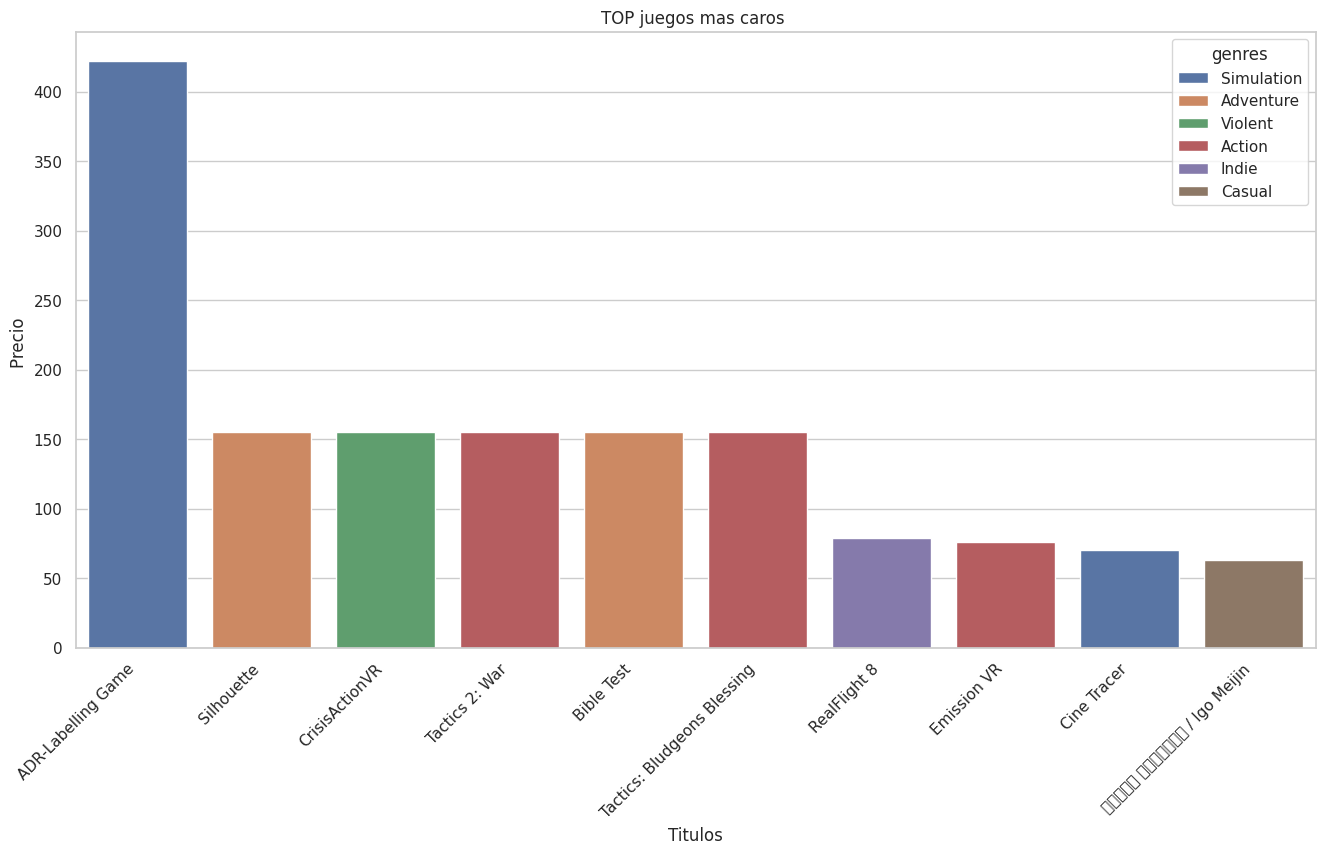

In [ ]:
# ordenando variable de generos filtrados para que estén ordenados por precio
filtered_price_genres_graph = filtered_price_genres.sort_values(by='price', ascending = False)
# Barplot
sns.set_theme(style="whitegrid")
#sns.load_dataset(df_anime)
fig,ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(x="name", y="price", hue="genres", data = filtered_price_genres_graph.head(10))
plt.xticks(rotation=45, ha='right')
ax.set_title('TOP juegos mas caros ')
ax.set_xlabel('Titulos')
ax.set_ylabel('Precio ')

In [ ]:
filtered_price_genres.query("price >= 54.99").sort_values(by="price", ascending = False)[['name', 'developer', 'publisher', 'genres','price','price']]

,name,developer,publisher,genres,price,price
21105,ADR-Labelling Game,Suomen Kuljetusturva Oy,Suomen Kuljetusturva Oy,Simulation,421.99,421.99
14917,CrisisActionVR,Pixel Wonder,Pixel Wonder,Violent,154.99,154.99
10624,Tactics: Bludgeons Blessing,Capt. McCay Soft,Capt. McCay Soft,Action,154.99,154.99
17126,Tactics 2: War,Capt McCay Soft,Capt McCay Soft,Action,154.99,154.99
10910,Silhouette,Apeirogon Games,Apeirogon Games,Adventure,154.99,154.99
25568,Bible Test,FIRST_UKRAINIAN,FIRST_UKRAINIAN,Adventure,154.99,154.99
18503,RealFlight 8,Knife Edge Software,Horizon Hobby,Indie,78.99,78.99
12212,Emission VR,VRSpec Team,VRSpec Team,Action,75.99,75.99
23709,Cine Tracer,Matt Workman,Cinematography Database,Simulation,69.99,69.99
18269,最強の囲碁 ～名人への道～ / Igo Meijin,UNBALANCE Corporation,UNBALANCE Corporation,Casual,62.99,62.99


In [ ]:
df_steam[df_steam['name'] == 'GameMaker Studio 2 UWP']

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
13062,GameMaker Studio 2 UWP,2017-03-08,1,YoYo Games Ltd.,YoYo Games Ltd.,windows;mac,0,In-App Purchases,Animation & Modeling,0,1,0,0,0,0-20000,303.99


Text(0, 0.5, 'Owners')

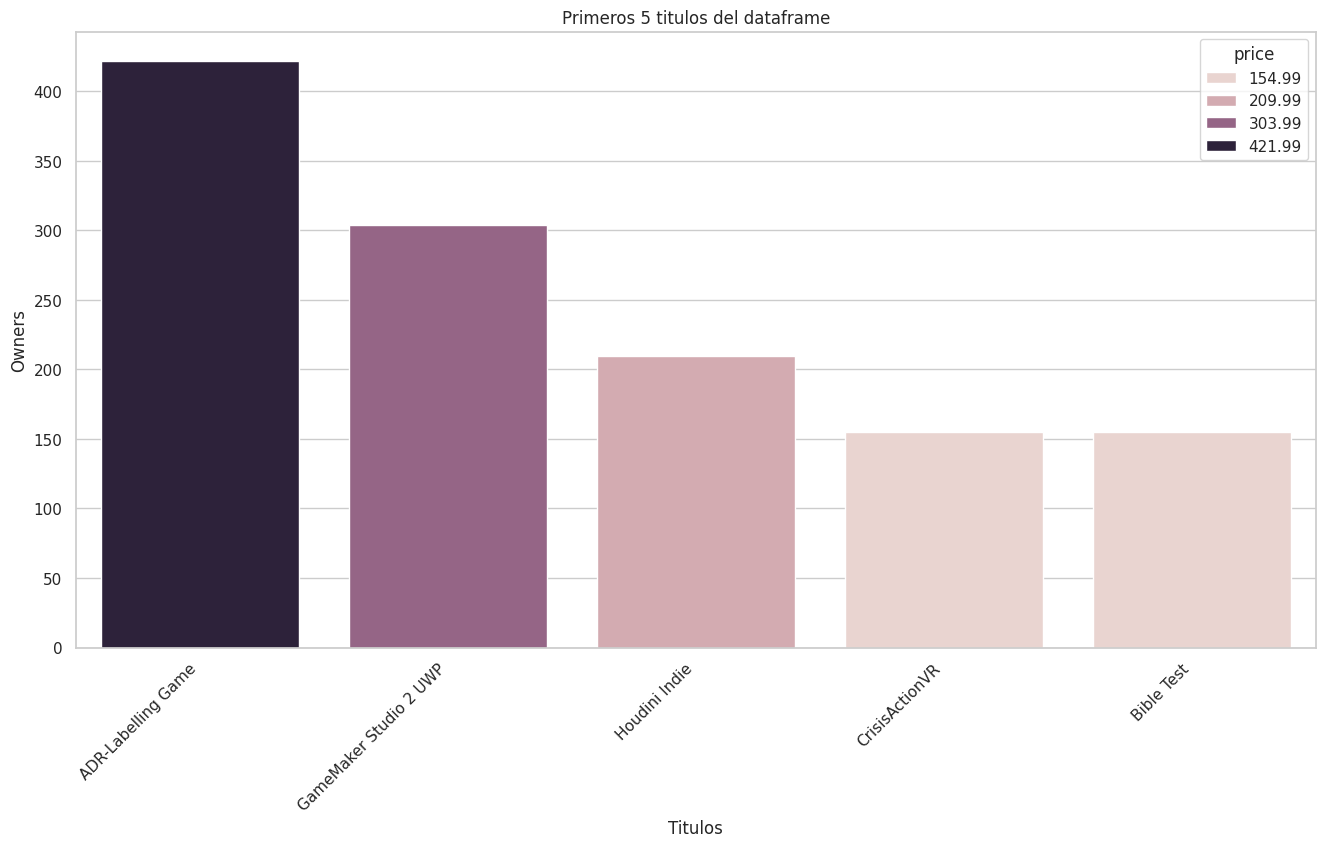

In [ ]:
most_expensive = df_steam.sort_values('price', ascending = False).head()

fig,ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(x="name", y='price', hue= 'price', data = most_expensive)
plt.xticks(rotation=45, ha='right')
ax.set_title('Primeros 5 titulos del dataframe')
ax.set_xlabel('Titulos')
ax.set_ylabel('Owners')

#Entrega de la clase 42
*# DESAFÍO Entrenando un algoritmo de Machine Learning*

i) Encoding,

ii) Ingeniería de atributos

iii) Entrenamiento de un modelo de Machine Learning Supervisado (Clasificación o Regresión) o no supervisado dependiendo de la pregunta problema.

# Ingeneria de atributos

In [ ]:
# Creo una nueva columna con el total de reseñas del juego
# total number of ratings (positive + negative)
data_steam = df_steam # creo un dummy del dataframe originakl
data_steam['total_ratings'] = data_steam['positive_ratings'] + data_steam['negative_ratings']
data_steam[['name','positive_ratings','negative_ratings','total_ratings']]

,name,positive_ratings,negative_ratings,total_ratings
0,Counter-Strike,124534,3339,127873
1,Team Fortress Classic,3318,633,3951
2,Day of Defeat,3416,398,3814
3,Deathmatch Classic,1273,267,1540
4,Half-Life: Opposing Force,5250,288,5538
...,...,...,...,...
27070,Room of Pandora,3,0,3
27071,Cyber Gun,8,1,9
27072,Super Star Blast,0,1,1
27073,New Yankee 7: Deer Hunters,2,0,2


#Empezamos con el Encoding

In [ ]:
#Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_steam['developer_encoded'] = label_encoder.fit_transform(data_steam['developer'])
data_steam['publisher_encoded'] = label_encoder.fit_transform(data_steam['publisher'])
data_steam['name_encoded'] = label_encoder.fit_transform(data_steam['name'])
data_steam['genres_encoded'] = label_encoder.fit_transform(data_steam['genres'])
data_steam['platforms_encoded'] = label_encoder.fit_transform(data_steam['platforms'])
data_steam['platforms_encoded'] = label_encoder.fit_transform(data_steam['platforms'])
data_steam['categories_encoded'] = label_encoder.fit_transform(data_steam['categories'])

# Drop non-numeric columns
non_numeric_columns = data_steam.select_dtypes(exclude=['int', 'float']).columns
data_steam.drop(non_numeric_columns, axis=1, inplace=True)
data_steam.head()

,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,total_ratings,developer_encoded,publisher_encoded,name_encoded,genres_encoded,platforms_encoded,categories_encoded
0,1,0,0,124534,3339,17612,317,7.19,127873,15118,12625,4799,1,6,329
1,1,0,0,3318,633,277,62,3.99,3951,15118,12625,21902,1,6,329
2,1,0,0,3416,398,187,34,3.99,3814,15118,12625,5635,1,6,497
3,1,0,0,1273,267,258,184,3.99,1540,15118,12625,5823,1,6,329
4,1,0,0,5250,288,624,415,3.99,5538,5659,12625,10042,1,6,2488


# Entrenamiento de modelo

Voy a realizar un modelo de regresión para predecir el 'Average playtime' tiempo jugado promedio.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Split data into training and testing sets

X = data_steam.drop(['average_playtime'], axis = 1)
y = data_steam['average_playtime']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
# Iniciarlizar y entrenar el modelo de regresion
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predicciones
y_pred = model.predict(X_test)

In [ ]:
X

,english,required_age,achievements,positive_ratings,negative_ratings,median_playtime,price,total_ratings,developer_encoded,publisher_encoded,name_encoded,genres_encoded,platforms_encoded,categories_encoded
0,1,0,0,124534,3339,317,7.19,127873,15118,12625,4799,1,6,329
1,1,0,0,3318,633,62,3.99,3951,15118,12625,21902,1,6,329
2,1,0,0,3416,398,34,3.99,3814,15118,12625,5635,1,6,497
3,1,0,0,1273,267,184,3.99,1540,15118,12625,5823,1,6,329
4,1,0,0,5250,288,415,3.99,5538,5659,12625,10042,1,6,2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1,0,7,3,0,0,2.09,3,12182,10209,18429,2,3,2855
27071,1,0,0,8,1,0,1.69,9,12503,1374,5200,1,3,623
27072,1,0,24,0,1,0,3.99,1,4494,3752,21337,1,3,1239
27073,1,0,0,2,0,0,5.19,2,16007,557,15056,2,5,3209


In [ ]:
y_pred

array([ 19.0006134 ,  94.43706062, 240.31204704, ...,  72.74704469,
        50.61191263,  41.13334269])

In [ ]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1407320.960258973


In [ ]:
# Metricas de evaluación de modelo
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
10506,0,19.000613
26313,88,94.437061
2622,332,240.312047
1489,303,281.158738
19949,0,36.577137
...,...,...
5764,0,32.206422
21825,0,24.408877
6909,0,72.747045
4772,0,50.611913


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 104.92931791089323
Mean Squared Error: 1407320.960258973
Root Mean Squared Error: 1186.3055931162817


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8650377126792117

#Modelo de clasificación

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Creando dummy para trabajar modelo
data_steam2 = df_steam # segundo dummy
data_steam2.head()

,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,total_ratings,developer_encoded,publisher_encoded,name_encoded,genres_encoded,platforms_encoded,categories_encoded
0,1,0,0,124534,3339,17612,317,7.19,127873,15118,12625,4799,1,6,329
1,1,0,0,3318,633,277,62,3.99,3951,15118,12625,21902,1,6,329
2,1,0,0,3416,398,187,34,3.99,3814,15118,12625,5635,1,6,497
3,1,0,0,1273,267,258,184,3.99,1540,15118,12625,5823,1,6,329
4,1,0,0,5250,288,624,415,3.99,5538,5659,12625,10042,1,6,2488


In [ ]:
# Assuming 'genres' is your target variable
X = data_steam2.drop(['genres_encoded'], axis=1)
y = data_steam2['genres_encoded']

In [ ]:
X

,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,total_ratings,developer_encoded,publisher_encoded,name_encoded,platforms_encoded,categories_encoded
0,1,0,0,124534,3339,17612,317,7.19,127873,15118,12625,4799,6,329
1,1,0,0,3318,633,277,62,3.99,3951,15118,12625,21902,6,329
2,1,0,0,3416,398,187,34,3.99,3814,15118,12625,5635,6,497
3,1,0,0,1273,267,258,184,3.99,1540,15118,12625,5823,6,329
4,1,0,0,5250,288,624,415,3.99,5538,5659,12625,10042,6,2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1,0,7,3,0,0,0,2.09,3,12182,10209,18429,3,2855
27071,1,0,0,8,1,0,0,1.69,9,12503,1374,5200,3,623
27072,1,0,24,0,1,0,0,3.99,1,4494,3752,21337,3,1239
27073,1,0,0,2,0,0,0,5.19,2,16007,557,15056,5,3209


In [ ]:
# Diviendo data en training y test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Iniciar modelo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predicciones
y_pred = model.predict(X_test)

In [ ]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acuracy: {accuracy}")

Acuracy: 0.37045244690674056


In [ ]:
y_pred

array([ 1,  1,  1, ..., 11, 24,  5])

In [ ]:
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_comparison)

       Actual  Predicted
10506      11          1
26313       1          1
2622        2          1
1489        2          2
19949       1          1
...       ...        ...
5764        1          1
21825       1         18
6909        1         11
4772        2         24
9845        1          5

[5415 rows x 2 columns]


El test de Acuracy ha dado muy bajo 19%

#Hypertuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Grid parameters
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

#fit the grid
grid_search.fit(X_train, y_train)

# Mejores hiperparametros
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Usar el mejor modelo
best_model = grid_search.best_estimator_


#Evaluar el mejor modelo
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.46094182825484764


Luego de hacer un Hypertuning el Accuracy del modelo ha aumentado a 30.54%

#nota
- Entiendo como ejecutar los modelos y como obtener resultados del mismo, pero me cuesta entender el resultado a la hora de pasar esto a negocio. O por ejemplo que hacer una vez que tengo el resultado de un modelo.

#Entrega clase 45 con fecha limite 19/03/2024
* 45. - Selección del Algoritmo y entrenamiento del Modelo I

* Ahora voy a realizar un modelo de RandomForest para predecir la variable 'Price' y también un Feature Selection determinar cuales son las variables que mas influyen en su resultado.


In [ ]:
# Aplicando un random forest al modelo con la variable target y (Price)
dummy_steam1 = df_steam # creo un dummy del dataframe original
dummy_steam1.head()

# Preparación de la data
X_random = dummy_steam1.drop('price', axis=1)
y_random = dummy_steam1['price']

In [ ]:
y_random

0        7.19
1        3.99
2        3.99
3        3.99
4        3.99
         ... 
27070    2.09
27071    1.69
27072    3.99
27073    5.19
27074    5.19
Name: price, Length: 27075, dtype: float64

In [ ]:
# Separación de la data

X_train, X_test, y_train, y_test = train_test_split(X_random, y_random, test_size=0.2, random_state=42)

# Entrenamiento modelo
from sklearn.ensemble  import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 84.90365251632687


In [ ]:
data_frame_random = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data_frame_random

,Actual,Predicted
10506,0.99,4.2188
26313,7.19,5.7964
2622,4.79,4.7256
1489,5.99,6.9452
19949,7.19,3.7631
...,...,...
5764,0.00,7.2020
21825,5.99,3.8243
6909,14.99,8.9970
4772,15.99,7.9114


Aquí realizo un DataFrame para comprar los precios Actuales y los Predicted

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.844239649122807
Mean Squared Error: 84.90365251632687
Root Mean Squared Error: 9.214317799833413


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.1732414532129194

El R2_score ha dado muy bajo, considero que hay que realizar hypertunning para mejorar los parametros del modelo

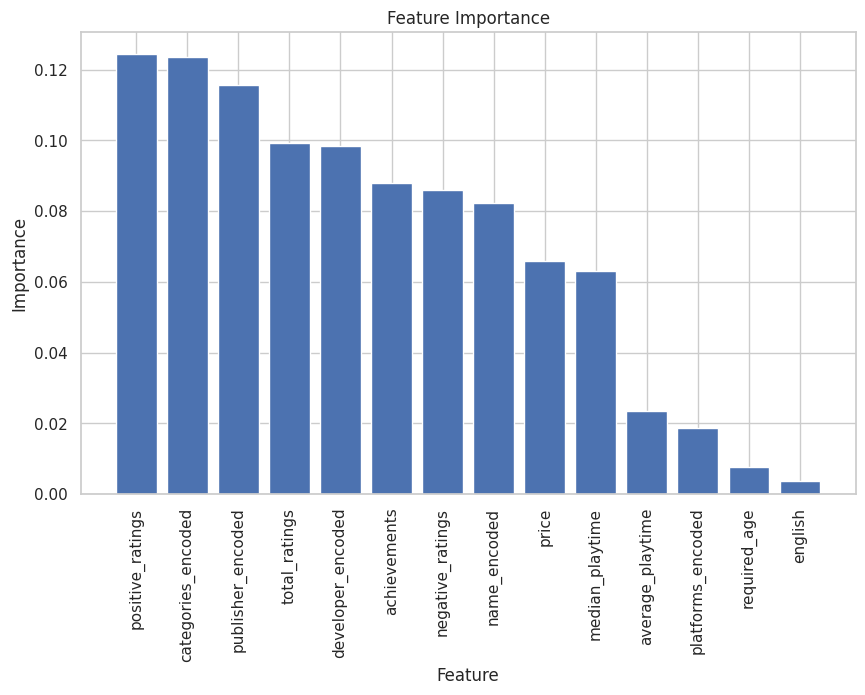

In [ ]:
# Obtener Feature_importance
feature_importance = rf_regressor.feature_importances_

# Crear dataframe para mostrar las feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Visualización de las Feature Importance
plt.figure(figsize=(10,6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

Como podemos ver la variable que mas influye en el precio es 'Positive_ratings', le sigue 'Categories' y 'Publisher'.

#Hypertuning

In [ ]:
# Subset del dataframe
subset_data = dummy_steam1.sample(n=100, random_state=42)
# Separate features and target variable in the subset
X_subset = subset_data.drop('price', axis=1)
y_subset = subset_data['price']
# Split the subset into training and testing sets
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

Antes de realizar el hypertuning voy a hacer que trabaje sobre un subset de 100 datos porque demora mucho en procesasr toda la información, quise realizar lo mismo con el DataFrame entero y al pasar los 40 minutos todavía no había terminado.

COn el subset de 100 datos el GridSearch ha demorado:   1 min 20 s

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters para afinar
param_grid = {
    'n_estimators': [100,200,300], # Numero de trees in the forest
    'max_depth': [None, 10, 20], # Maximum depth of the trees
    'min_samples_split': [2,5,], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1,2,4] # Minimum number of samples required to be at a leaf node
}

# Initiliaze RandomForest Regressor
rf_regressor =RandomForestRegressor(random_state=42)

# Initiliaze GridSearchCV
grid_search_subset = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Perform Grid Search
grid_search_subset.fit(X_train_subset, y_train_subset)

# Get the best hyperparameters
best_hyperparameters_subset = grid_search_subset.best_params_


#Print hyperparameters
print("Best Hyperparameters:", best_hyperparameters_subset)

# Get the best model
#best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


#Ahora que tengo resultados de que parametros son los mejores para el RandomForest voy a volver a ejecutar el modelo


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize RandomForestRegressor with the best hyperparameters obtained from the subset
best_rf_regressor_subset = RandomForestRegressor(**best_hyperparameters_subset, random_state=42)

# Train the model on the subset training dataset
best_rf_regressor_subset.fit(X_train_subset, y_train_subset)

# Make predictions on the subset testing dataset
best_y_pred_subset = best_rf_regressor_subset.predict(X_test_subset)

# Evaluate the model performance on the subset testing dataset
best_mse_subset = mean_squared_error(y_test_subset, best_y_pred_subset)
best_r2_subset = r2_score(y_test_subset, best_y_pred_subset)

# Compare with previous MSE
print("Best Mean Squared Error on Subset Dataset:", best_mse_subset)
print("Best R2 Score on Subset Dataset:", best_r2_subset)

Best Mean Squared Error on Subset Dataset: 56.06912149270785
Best R2 Score on Subset Dataset: -0.47962059190996786


El modelo se aplicó también al subset. No al DataFrame original, al parecer dio un mejor R2_score que antes

#Entrega duodécima fecha limite 26/03/2024
#DESAFÍO
*Ingeniería de atributos y selección de variables

#1)Elección de data

In [ ]:
# Aplicando un random forest al modelo con la variable target y (Price)
dummy_steam2 = df_steam # creo un dummy del dataframe original
dummy_steam2.head()

,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,total_ratings,developer_encoded,publisher_encoded,name_encoded,genres_encoded,platforms_encoded,categories_encoded
0,1,0,0,124534,3339,17612,317,7.19,127873,15118,12625,4799,1,6,329
1,1,0,0,3318,633,277,62,3.99,3951,15118,12625,21902,1,6,329
2,1,0,0,3416,398,187,34,3.99,3814,15118,12625,5635,1,6,497
3,1,0,0,1273,267,258,184,3.99,1540,15118,12625,5823,1,6,329
4,1,0,0,5250,288,624,415,3.99,5538,5659,12625,10042,1,6,2488


#2) Preparación y separación de la data


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
# Preparación de la data
X_random2 = dummy_steam2.drop('price', axis=1)
y_random2 = dummy_steam2['price'] # variable target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_random2, y_random2, test_size=0.2, random_state = 42)

# Model Selection
# Inicilizar y entrenar diferentes modelos
models = {
    'RandomForest': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    #Agregar otros modelos
}

In [ ]:
# Compute accuracy
#accuracy = accuracy_score(y_test, y_pred_binary)

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test,y_pred)
  print(f"{name} - Mean Squared Error: {mse}")
  print(f"{name} - R2_score: {r2}")

# Ejecutar PCA
# Standarizar las features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_random2)

# Applicar pCA
pca = PCA(n_components =2)
X_pca = pca.fit_transform(X_scaled)

RandomForest - Mean Squared Error: 86.25929505857432
RandomForest - R2_score: 0.16004073657736928
LinearRegression - Mean Squared Error: 105.12325230805334
LinearRegression - R2_score: -0.023649097958710286


#3) Visualización de PCA

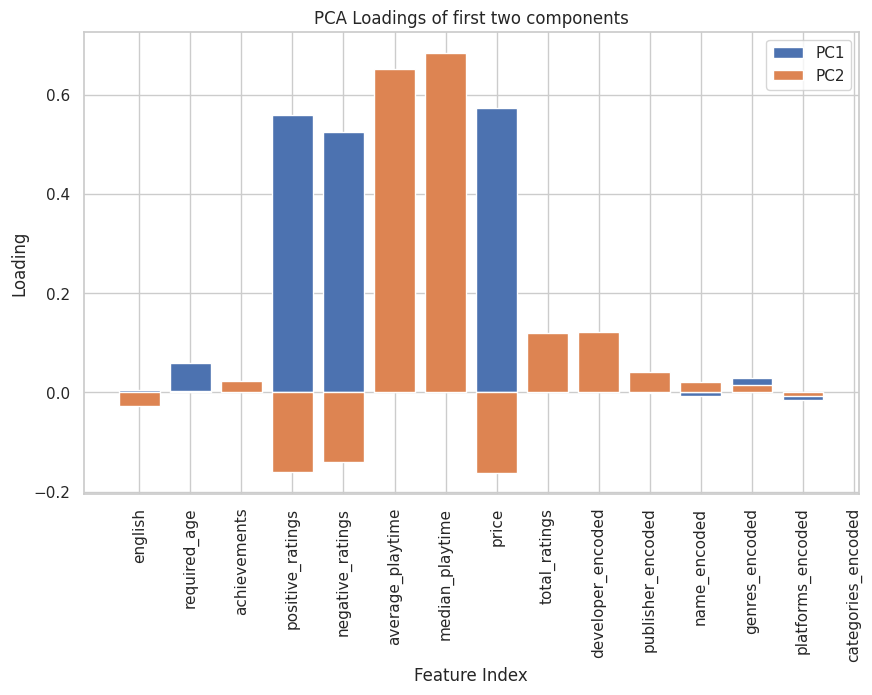

In [ ]:
# Extract the loadings of the first two principal components
loadings = pca.components_
# Definir nombres de features
feature_names = ['english','required_age','achievements','positive_ratings','negative_ratings','average_playtime','median_playtime','price','total_ratings','developer_encoded', 'publisher_encoded',
       'name_encoded', 'genres_encoded', 'platforms_encoded',
       'categories_encoded']

plt.figure(figsize=(10,6))
plt.bar(range(len(loadings[0])), loadings[0],label='PC1')
plt.bar(range(len(loadings[1])), loadings[1], label='PC2')
plt.xlabel('Feature Index')
plt.ylabel('Loading')
plt.title('PCA Loadings of first two components')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)  # Set feature names as x-axis labels
plt.legend()
plt.show()

Basandome en los resultados de la grafica de PCA, se entiende que las 5 principales features o variables que influyen en la variable taget y ('Price') son:


*Positive_ratings

*Negative_ratings

*average_playtime

*median_playtime

*price


---


---





Si bien 3 de ellas la barra se extiende hacia abajo en numeros negativos indicando que no influye, la barra positiva se incrementa mucho más.

#Considero también que el resultado del modelo, según las metricas son bastante malas, entiendo que debería mejorar el hypertuning




---



#Entrega Complementaria fecha limite 03/03/2024
#DESAFÍO
*Crossvalidation y mejora de modelos de ML

# 1. Cargar Datos y preparar la data
# Cargar el dataframe y comenzar el preprocessing

In [ ]:
dummy_cross = df_steam

x_random3 = dummy_cross.drop('price', axis= 1)
y_random3 = dummy_cross['price']

x_random3.head()

,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,total_ratings,developer_encoded,publisher_encoded,name_encoded,genres_encoded,platforms_encoded,categories_encoded
0,1,0,0,124534,3339,17612,317,127873,15118,12625,4799,1,6,329
1,1,0,0,3318,633,277,62,3951,15118,12625,21902,1,6,329
2,1,0,0,3416,398,187,34,3814,15118,12625,5635,1,6,497
3,1,0,0,1273,267,258,184,1540,15118,12625,5823,1,6,329
4,1,0,0,5250,288,624,415,5538,5659,12625,10042,1,6,2488


In [ ]:
y_random3.head()

0    7.19
1    3.99
2    3.99
3    3.99
4    3.99
Name: price, dtype: float64

# 2. Elegir Modelo

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

cv = KFold(n_splits=5, shuffle=True, random_state=42) # Ejemplo de K-fold Cross-Validation, ajustar parametros como sea necesario

# 3. Aplicar Cross-Validation
# Definir un metodo de Cross Validation

model = LinearRegression()

cv_scores = cross_val_score(model, x_random3, y_random3, cv= cv, scoring='neg_mean_squared_error')

#4 Evaluar performance del modelo
# Calcular mean and standard deviation de cross-validation scores

mean_cv_score = cv_scores.mean()
std_cv_score =  cv_scores.std()

print(f"Mean Cross-Validation MSE: {mean_cv_score}")
print(f"Standard Deviation of Cross-Validation MSE: {std_cv_score}")

Mean Cross-Validation MSE: -61.078254020602415
Standard Deviation of Cross-Validation MSE: 22.071587449928302


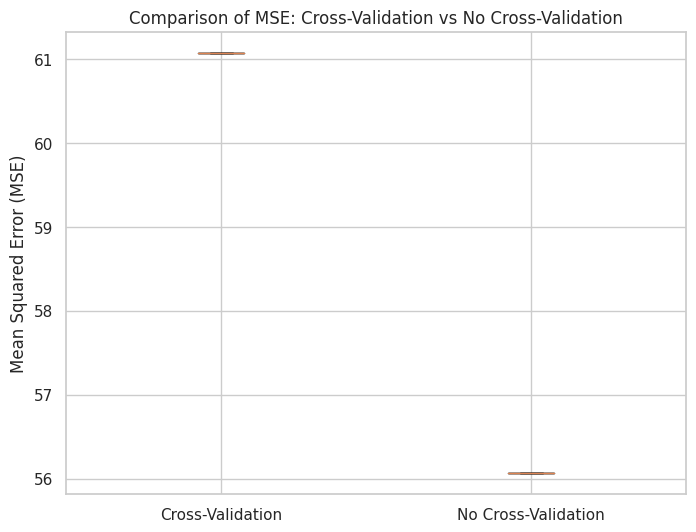

In [ ]:
# 5. Compare Performance
# Compare cross-validation performance with previous performance observed without cross-validation

"""
Before I executed a RandomForestRegressor() and this was the result:
Best Mean Squared Error on Subset Dataset: 56.06912149270785
Best R2 Score on Subset Dataset: -0.47962059190996786 """

# Definir valores MSE obtenidos del cross-validation y del RandomForestRegressor()
cross_val_mse = [61.078254020602415]  # Example value obtained from cross-validation
no_cross_val_mse = [56.06912149270785]  # Example value obtained without cross-validation (RandomForestRegressor())

plt.figure(figsize=(8,6))
plt.boxplot([cross_val_mse, no_cross_val_mse], labels =['Cross-Validation', 'No Cross-Validation'])
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE: Cross-Validation vs No Cross-Validation')
plt.show()

# 6. Resumen y conclusión

In [ ]:
""" Basandome en los resultados obtenidos, parece que utilizando el cross-validation con el modelo de regresión lineal(Linear Regressor()),
    ha resultado en un MSE mas alto comparado con el obtenido en el RandomForestRegressor() sin utilizar cross-validation.
 """

Posibles razónes de por que ha ocurrido esto:

**Complejidad del modelo:**

Los modelos de regresión lineal pueden tener limitaciones a la hora de capturar relaciones complejas presentes en los datos, especialmente si la relación entre las características y la variable objetivo no es lineal. RandomForestRegressor, por otro lado, es capaz de capturar relaciones no lineales y puede haberse adaptado mejor a la complejidad del conjunto de datos.

**Ajustes de Hiperparametros:**

El modelo de regresión lienal con cross validation ha sido utilizado con parametros determinados, en cambio el RandomForest() lo ajusté con el GridSearch para encontrar los mejores parametros posibles.